[该分类代码参考了该篇文章](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

## 设置transform,用于对数据进行转换

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
)

## 加载训练集和测试集，同时进行shuffle,batch_size，transform等设置

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

In [6]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)

Files already downloaded and verified


In [7]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

## 类别名称

In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

## 训练集图片可视化

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [11]:
torch.max(images)

tensor(0.9686)

In [12]:
torch.min(images)

tensor(-1.)

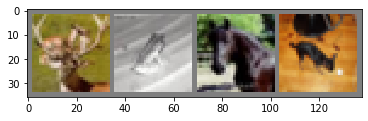

 deer  frog horse   dog


In [13]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 定义网络结构

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

## 定义损失函数和优化器

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 查看网络结构

In [16]:
net.modules

<bound method Module.modules of Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [17]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

## 查看网络处于eval还是traning状态

In [18]:
net.training

True

## 开始网络训练，epoch设置为2，并输出损失值

In [19]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.207
[1,  4000] loss: 1.820
[1,  6000] loss: 1.648
[1,  8000] loss: 1.565
[1, 10000] loss: 1.497
[1, 12000] loss: 1.472
[2,  2000] loss: 1.377
[2,  4000] loss: 1.381
[2,  6000] loss: 1.340
[2,  8000] loss: 1.320
[2, 10000] loss: 1.304
[2, 12000] loss: 1.262
Finished Training


## 仅仅保存模型的权重

这里有个不错的解释:
    In Pytorch, the learnable parameters(weights and biases) of an torch.nn.Module model are contained in the model's parameters(accessed with model.parameters()). A state_dict is simply a Python dictionary object that maps
each layer to its parameter tensor.Note that only layers with learnable parameters(convolutional layers, linear layers) and registered buffers(batchnorm's running_mean) have entries in the model's state_dict. Optimizer objects(torch.optim) also have a state_dict, which contains information about the opimizer's state, as well as the hyperparameters used.
    Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers

In [20]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## 可视化测试集的图片

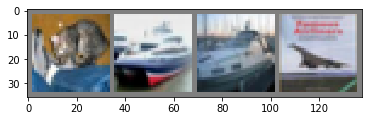

GroundTruth:    cat  ship  ship plane


In [21]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 因为网络里不包含dropout等，所以这里网络的状态直接是training也没事

In [22]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [23]:
outputs = net(images)

In [24]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat truck  ship plane


## 在10000张测试集上的准确率

计算公式和下面这个理解很类似:
    Accuracy = (TP + TN) / (TP + TN + FP + FN)

In [25]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


## 在每个类别上的准确率

计算公式和下面这个理解很类似: Recall = TP / (TP + FN)

In [26]:
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 51 %
Accuracy of  bird : 35 %
Accuracy of   cat : 19 %
Accuracy of  deer : 50 %
Accuracy of   dog : 33 %
Accuracy of  frog : 65 %
Accuracy of horse : 77 %
Accuracy of  ship : 56 %
Accuracy of truck : 79 %


关于上面的Accuracy和Recall计算，可以参考下[这篇文章](https://medium.com/@shivangisareen/precision-recall-accuracy-6a214187f059)

## 想在GPU上训练的话要用到

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [28]:
device

device(type='cuda', index=0)